### Import

In [18]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist

### Fake Data

In [60]:
nPoints = 200
maxDistance = 0.15
X = (np.random.random((nPoints,2))-0.5)*1.5
X[0,:] = 0
Dm = squareform(pdist(X))

### Create Graph

In [61]:
G = {}
for i in range(nPoints):
    for j in range(nPoints):
        if (i != j):
            distance = Dm[i,j]
            if (distance < maxDistance):
                if i in G:
                    edges = G[i]
                    edges.append(j)
                    G[i] = edges
                else:
                    G[i] = [j]

### Plot Graph

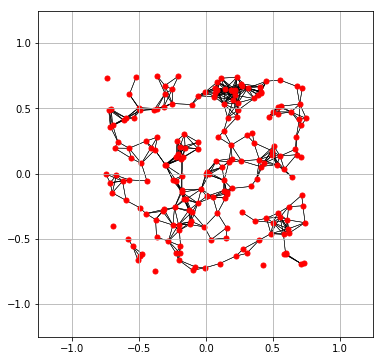

In [64]:
plt.figure(figsize=(6,6))
for node in G:
    for edge in G[node]:
        x1 = X[node,0]
        y1 = X[node,1]
        x2 = X[edge,0]
        y2 = X[edge,1]
        plt.plot([x1,x2],[y1,y2],c='k',linewidth=0.5,zorder=0)
plt.scatter(X[:,0],X[:,1],c='r',s=25,zorder=1)
plt.axis((-1.25,1.25,-1.25,1.25));
plt.grid()

### Depth First Search Helper

In [65]:
def dfs(G,node,visited):
    
    for edge in G[node]:
        if edge not in visited:
            visited.append(edge)
            dfs(G,edge,visited)
    return visited

### Depth First Search

In [68]:
startNode = 0
visited = [startNode]
node = stack[0]
visited = dfs(G,node,visited)